# Multi-step Time Series Forecasting with ARIMA, LightGBM

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# for LightBGM model
import lightgbm as lgb



## 1. Cyclic Time Series (Sunspot data)

Cyclic time series have rises and falls that are not a fixed frequency,
which is different from seasonal: having fixed and known frequency

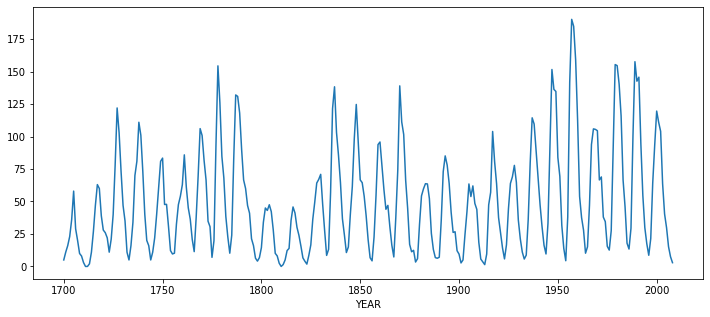

In [2]:
# import dataset
import statsmodels.api as sm
data = sm.datasets.sunspots.load_pandas()
ts_sun = data.data.set_index('YEAR').SUNACTIVITY
ts_sun.plot(figsize=(12,5))
plt.show()

ADF statistics: -2.837780724938196
p-value: 0.05307642172812043
1%: -3.4523371197407404
5%: -2.871222860740741
10%: -2.571929211111111


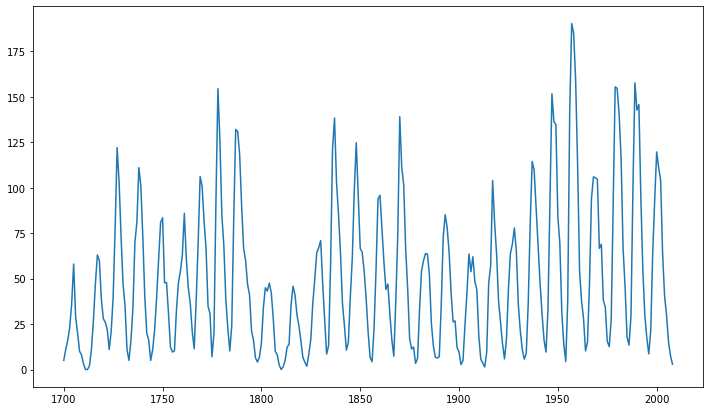

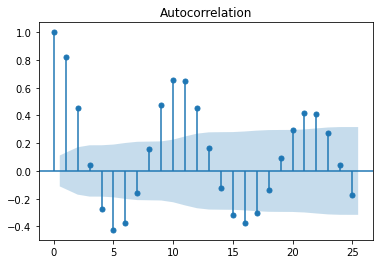

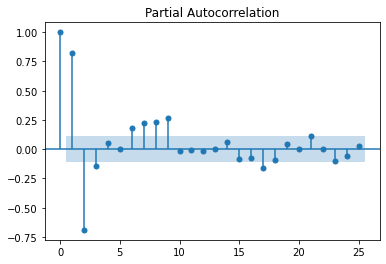

In [3]:
# check for stationary by plotting ACF, PACF and Augmented Dick-Fuller test

def tsplot(y, lags=None, figsize=(12,7)):
    '''
    Plot time series, its ACF and PACF, calculate Dickey-Fuller test

    y - time series
    lags - how many lags to include in ACF, PACF calculation
    '''

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Line plot, ACF and PACF:
    fig = plt.figure(figsize=figsize)
    plt.plot(y)
    plot_acf(y, lags=lags)
    plot_pacf(y, lags=lags)

    # Adfuller
    result = adfuller(y)
    print("ADF statistics:", result[0])
    print("p-value:", result[1])
    for key, value in result[4].items():
        print("{}: {}".format(key, value))

tsplot(ts_sun)


The above graphs indicate an ARIMA(8, 1, 0):
- There is significant correlation until lag 8
- The difference maybe 1


In [7]:
print(type(ts_sun))
print(ts_sun.head())

# train-test split:
train_len = int(len(ts_sun) * 0.8 )
sun_train, sun_test = ts_sun.iloc[:train_len], ts_sun.iloc[train_len:]

<class 'pandas.core.series.Series'>
YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
Name: SUNACTIVITY, dtype: float64


### 1.2. LightBMG model